In [5]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

In [8]:
xl = pd.ExcelFile('Volve production data.xlsx') #this loads the Volve daily production data from the attached excel file
conn = sqlite3.connect("VolveProduction.db")
cur = conn.cursor()

df = xl.parse('Daily Production Data') #extracts the data from the first tab of the Excel sheet
df.to_sql("DailyRates", conn, if_exists='append', index = False) #this stores all data from the excel file into a database called DailyRates



#cur.execute("DROP TABLE DailyRates") another way to delete the table



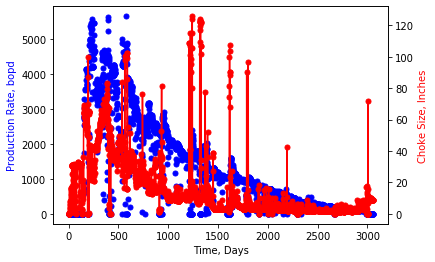

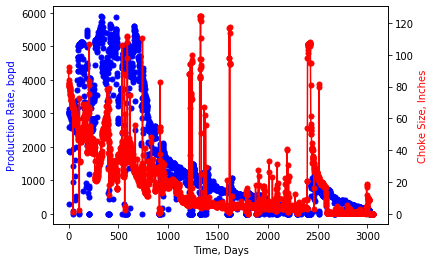

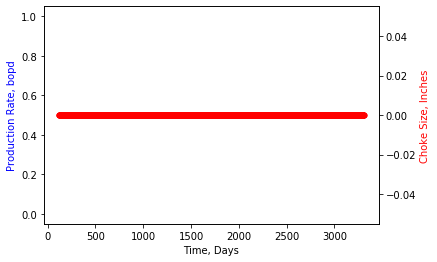

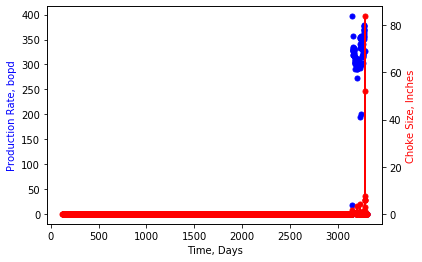

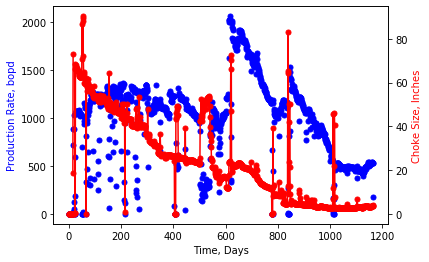

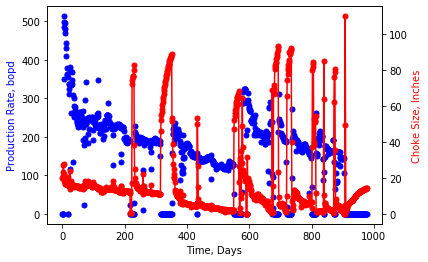

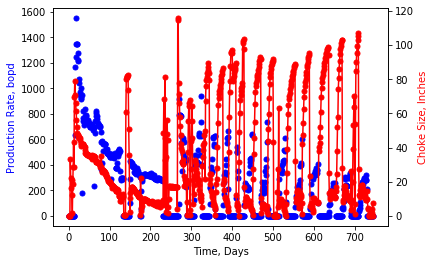

In [9]:
wellID = [5351,5599,5693,5769,7078,7289,7405]

for i in wellID:
    testWellDF = pd.read_sql_query(f"SELECT DP_CHOKE_SIZE,BORE_OIL_VOL FROM DailyRates WHERE NPD_WELL_BORE_CODE = {i};", conn)
    
    fig,ax1 = plt.subplots()
    
    ax2 = ax1.twinx()
    ax1.plot(testWellDF['BORE_OIL_VOL'],color="blue",ls='None',marker='o',markersize=5,)
    ax2.plot(testWellDF['DP_CHOKE_SIZE'],color="red",ls='solid',marker='o',markersize=5,label = 'Well' + str(i))
    
    ax1.set_xlabel('Time, Days')
    ax1.set_ylabel('Production Rate, bopd', color='b')
    ax2.set_ylabel('Choke Size, Inches', color='r')
    
    plt.show()